<a href="https://colab.research.google.com/github/Upanshujha/Zeotap/blob/main/Upanshu_Jha_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load data
customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")

In [24]:
# Merge datasets
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Basic EDA
print("Missing Values:\n", merged_data.isnull().sum())
print("\nData Shape:", merged_data.shape)

Missing Values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

Data Shape: (1000, 13)


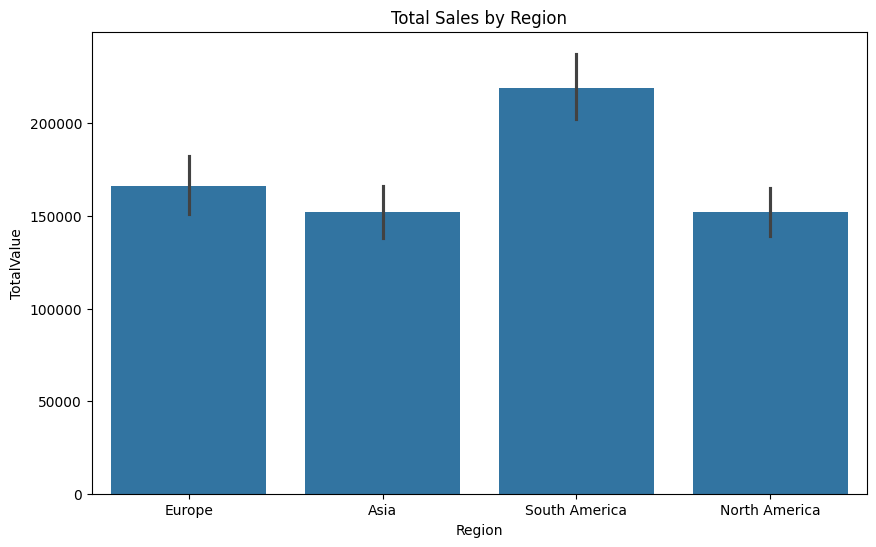

In [25]:
# Business Insights
# 1. Sales by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='TotalValue', data=merged_data, estimator=sum)
plt.title("Total Sales by Region")
plt.show()

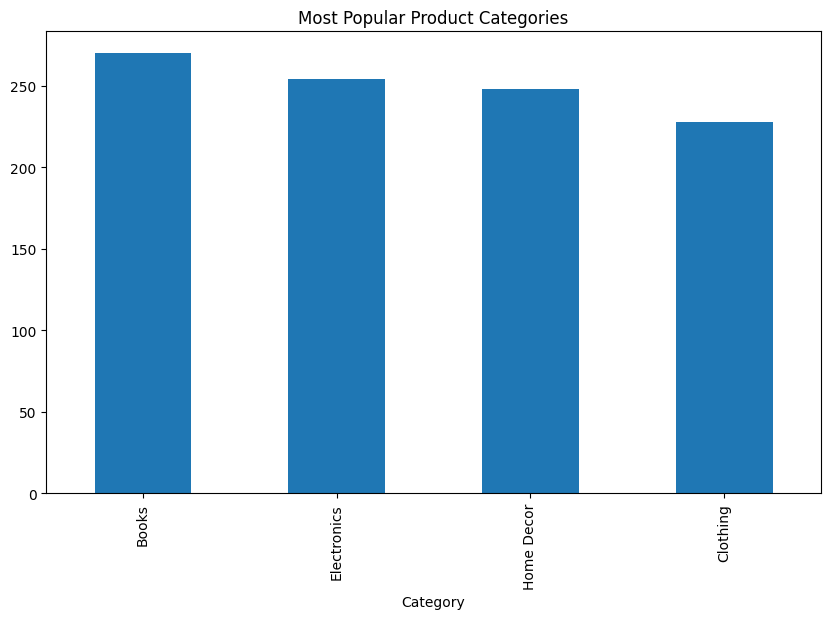

In [26]:
# 2. Top Product Categories
plt.figure(figsize=(10, 6))
merged_data['Category'].value_counts().plot(kind='bar')
plt.title("Most Popular Product Categories")
plt.show()

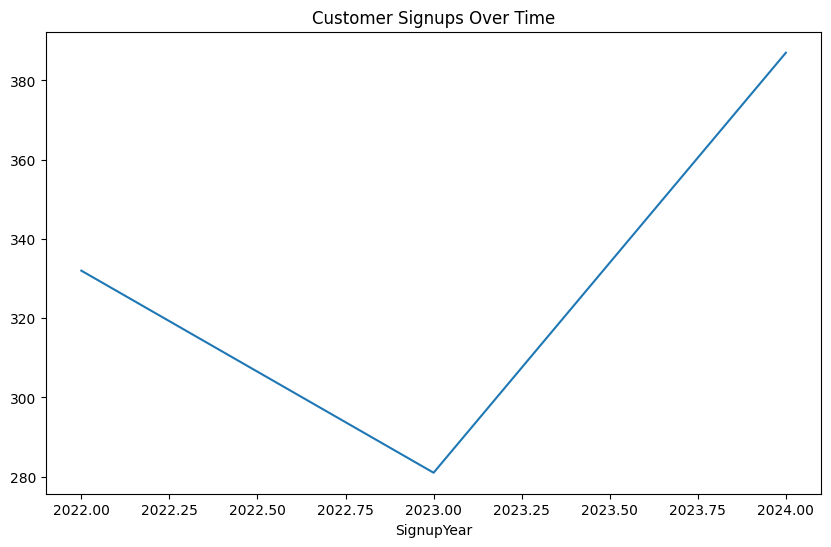

In [27]:
# 3. Customer Signup Trends
merged_data['SignupYear'] = pd.to_datetime(merged_data['SignupDate']).dt.year
plt.figure(figsize=(10, 6))
merged_data['SignupYear'].value_counts().sort_index().plot(kind='line')
plt.title("Customer Signups Over Time")
plt.show()

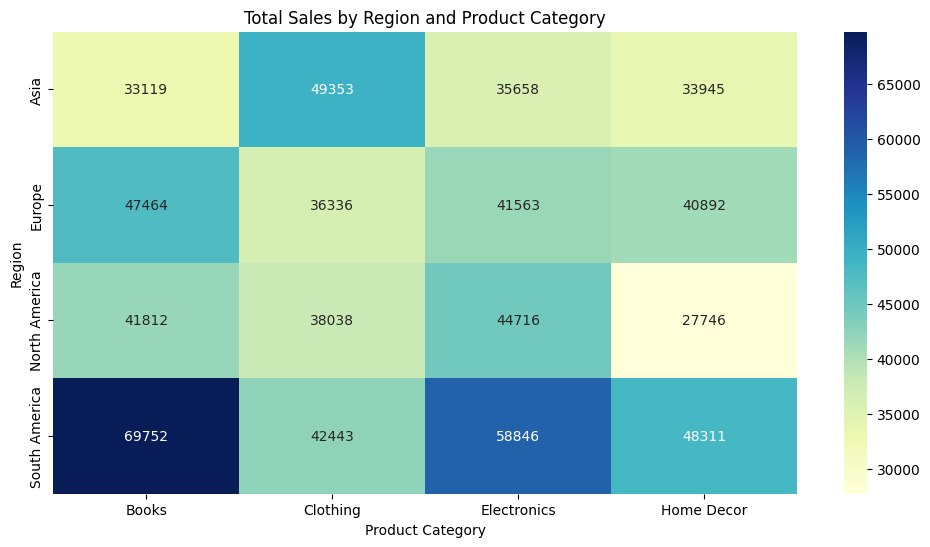

In [28]:
# 4. Regional Sales Performance by Product Category
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge data (assuming transactions.csv has CustomerID, ProductID, TotalValue)
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Insight: Top Categories by Region
plt.figure(figsize=(12,6))
cross_tab = pd.crosstab(merged_data['Region'], merged_data['Category'], values=merged_data['TotalValue'], aggfunc='sum')
sns.heatmap(cross_tab, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Total Sales by Region and Product Category")
plt.xlabel("Product Category")
plt.ylabel("Region")
plt.show()

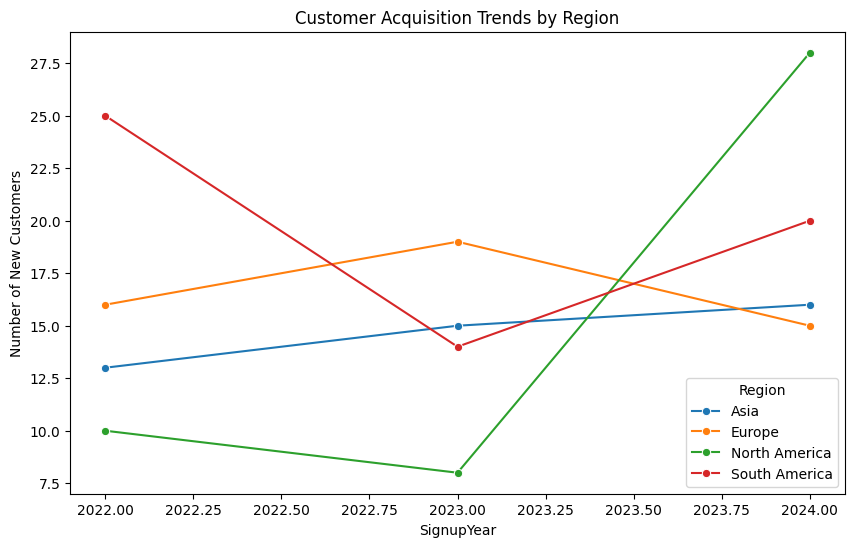

In [29]:
#5. Customer Acquisition Trends by Region

# Extract year from signup date
merged_data['SignupYear'] = pd.to_datetime(merged_data['SignupDate']).dt.year

# Insight: Regional signup trends over time
plt.figure(figsize=(10,6))
sns.lineplot(
    x='SignupYear',
    y='CustomerID',
    hue='Region',
    data=merged_data.groupby(['Region', 'SignupYear'])['CustomerID'].nunique().reset_index(),
    marker='o'
)
plt.title("Customer Acquisition Trends by Region")
plt.ylabel("Number of New Customers")
plt.show()